In [92]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [93]:
src = cv.imread('../Images/1/Barbara.bmp')
im1 =  cv.cvtColor(src, cv.COLOR_BGR2GRAY)

In [94]:
def quantize_gray_scale_image(img, level = 8 ):
    segment_size = 256/level
    return ((img/segment_size).astype(np.uint8)*segment_size).astype(np.uint8)

def compute_histogram(image, number_bins=256):

    image_height = image.shape[0]
    image_width = image.shape[1]
    print(f"{image_height}, {image_width}")
    histogram = np.zeros([number_bins], np.uint16)

    for x in range(0, image_height):
        for y in range(0, image_width):
            histogram[image[x,y]] +=1

    return histogram

def plot_histogram(histogram , name):
    plt.figure()
    plt.title("Gray Image Histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0, 256])
    plt.plot(histogram[:]) 
    plt.savefig(name)
    plt.show();
    

512, 512


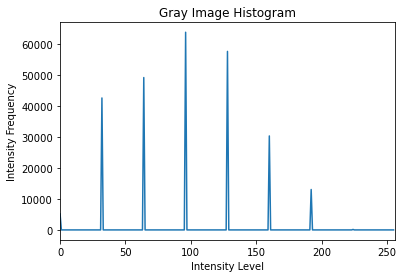

512, 512


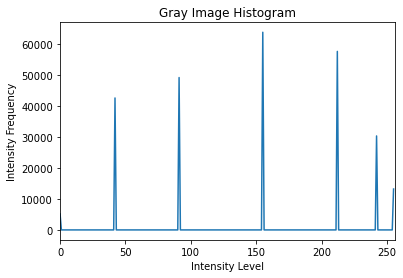

512, 512


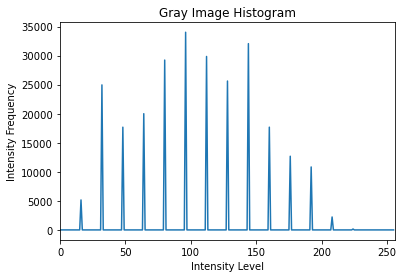

512, 512


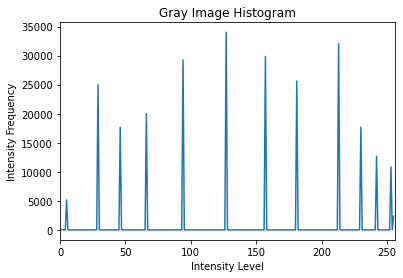

512, 512


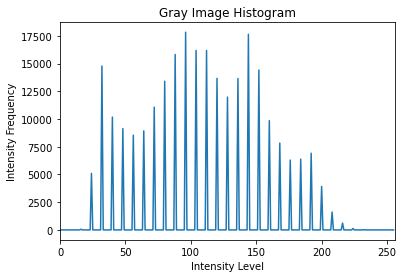

512, 512


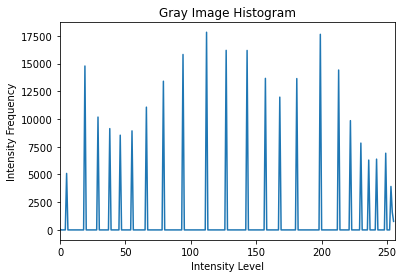

512, 512


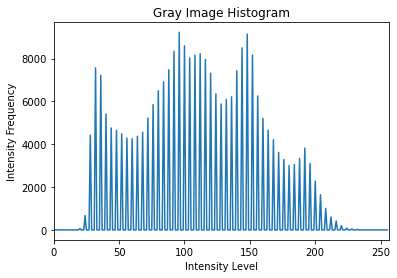

512, 512


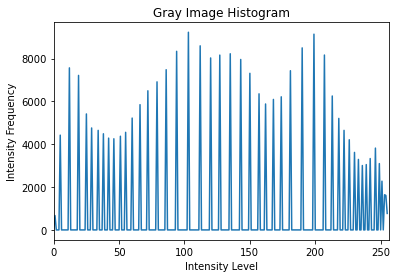

512, 512


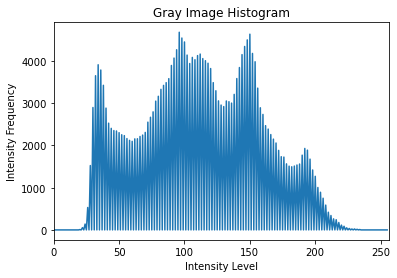

512, 512


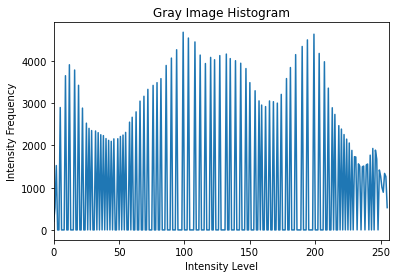

In [100]:
levels = [8,16,32,64,128]
mmses = []
mmses_histeq = []
for lvl in levels:
    quantized = quantize_gray_scale_image(im1 , lvl)
    Image.fromarray(quantized.astype(np.uint8)).save(f'quantization/quantized_{lvl}.png')
    
    histogram = compute_histogram(quantized)
    plot_histogram(histogram , f"quantization/quantized_hist_{lvl}.png")
    
    mmses.append(np.square(np.subtract(im1,quantized)).mean())
    
    equalized_and_quantized = cv.equalizeHist(quantized)
    
    Image.fromarray(equalized_and_quantized.astype(np.uint8)).save(f'quantization/equalized_and_quantized_{lvl}.png')
    
    histogram = compute_histogram(equalized_and_quantized)
    plot_histogram(histogram , f"quantization/equalized_and_quantized_hist_{lvl}.png")
    
    mmses_histeq.append(np.square(np.subtract(quantized,equalized_and_quantized)).mean())

In [101]:
print(mmses)
print(mmses_histeq)

[91.5988883972168, 76.1368522644043, 17.510936737060547, 3.494274139404297, 0.4999809265136719]
[140.38868713378906, 130.0508689880371, 94.77213668823242, 104.38995742797852, 106.75617218017578]


[[125 120 109 ...  90  93  94]
 [ 77  73  70 ...  91  94  95]
 [ 71  80  83 ...  93  96  97]
 ...
 [ 66  67  68 ...  91 100  92]
 [ 57  62  74 ...  96  99  99]
 [ 53  61  69 ...  98 100 100]]
